## 1. Perceptron algorithm implemented in NumPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class Perceptron():
    """train linear separator, generate data to use, and produce 2d and 3d plots of resulting separator"""

    def __init__(self, dimentions):
        
        #initialise weight vector at zero and absorb intercept into weight vector
        self.weights = np.zeros(dimentions + 1)
        self.epochs = 0
    
    def train(self, data, labels):
        """accepts array of features and array of labels"""
        
        intercept = np.ones(len(data))
        train_data = np.column_stack((data, intercept))
        
        while True:
            m = 0
            for x, l in zip(train_data, labels):
                inner = l * np.dot(self.weights, x)
                if inner <= 0:
                    self.weights += l * x
                    m += 1
            self.epochs += 1
            
            #only successful if all data points are linearly separable
            if m == 0:
                break
                
            #epoch limit
            elif self.epochs > 10000:
                print('Too hard')
                break
                
    
    def gen_data(self, mean1=5, mean2=10, sd=1.5, num_points=10):
        """returns 2d vector of likely linearly separable normally distributed data and an array of labels"""
        
        x1 = np.hstack((np.random.normal(mean1, sd, num_points), np.random.normal(mean2, sd, num_points)))
        x2 = np.hstack((np.random.normal(mean1, sd, num_points), np.random.normal(mean2, sd, num_points)))
        labels = np.hstack((np.ones(num_points) * -1, np.ones(num_points)))
        data = np.vstack((x1, x2)).T
        return data, labels
    
    def test(self, test_data):
        """accepts 2d feature vector"""
        
        #multiple test points
        if test_data.ndim > 1:
            test_intercept = np.ones(len(test_data))
            test_data = np.column_stack((test_data, test_intercept))
            
        #single test point
        else:
            test_data = np.hstack((test_data, 1))
        return np.sign(np.dot(self.weights, test_data.T))
    
    def line_plot(self, data, labels):
        """returns 2d plot of data and separator, accepts np array of 2d feature vector and array of lables"""
        
        #split data into classes
        data1 = data[labels == 1]
        data2 = data[labels == -1]
        
        #calculate coords of separator line
        x = np.arange(min(data[:, 0]) // 1, (max(data[:, 0]) // 1) + 2)
        y = (-1 * (self.weights[0]*x + self.weights[2])) / self.weights[1]
        
        #plot linear separator and data points
        fig, ax = plt.subplots(1, 1)
        ax.scatter(data1[:, 0], data1[:, 1], label='+1')
        ax.scatter(data2[:, 0], data2[:, 1], label='-1')
        ax.plot(x, y, color='g')
        plt.xlim(min(data[:, 0]) - 2, max(data[:, 0]) + 2)
        plt.ylim(min(data[:, 1]) - 2, max(data[:, 1]) + 2)
        plt.xlabel('Dim 1')
        plt.ylabel('Dim 2')
        plt.legend()
        return plt.show()
    
    def plane_plot(self, data, labels):
        """returns 3d plot of data and separator, accepts np array of 2d feature vector and array of labels """
        
        data1 = data[labels == 1]
        data2 = data[labels == -1]
        
        #calculate coords of separator plane 
        a = min(data[:, 0]) // 1
        b = max(data[:, 0] + 2) // 1
        c = min(data[:, 1]) // 1
        d = max(data[:, 1] + 2) // 1
        xx, yy = np.meshgrid(np.arange(a, b), np.arange(c, d))
        z = (-1 * (self.weights[0] * xx + self.weights[1] * yy)) / self.weights[2]
        
        #plot separator plane and data points
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(xx, yy, z, color='g', alpha=0.5)
        ax.scatter(data1[:, 0], data1[:, 1], np.ones(len(data1[:, 0])), label='+1')
        ax.scatter(data2[:, 0], data2[:, 1], np.ones(len(data2[:, 0])), label='-1')
        plt.xlabel('Dim 1')
        plt.ylabel('Dim 2')
        fig.legend()
        return plt.show()

### Test

In [3]:
%matplotlib notebook

In [4]:
model = Perceptron(2)

data, labels = model.gen_data()

model.train(data, labels)

model.epochs

48

In [5]:
test = model.test(data)

(test == labels).all()

True

<IPython.core.display.Javascript object>


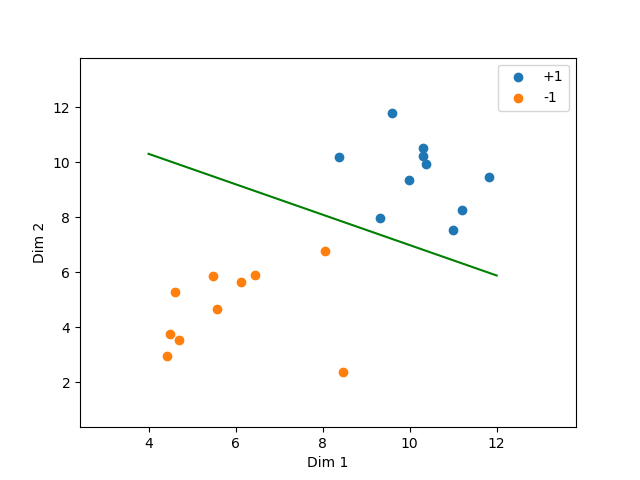

In [6]:
model.line_plot(data, labels)

<IPython.core.display.Javascript object>


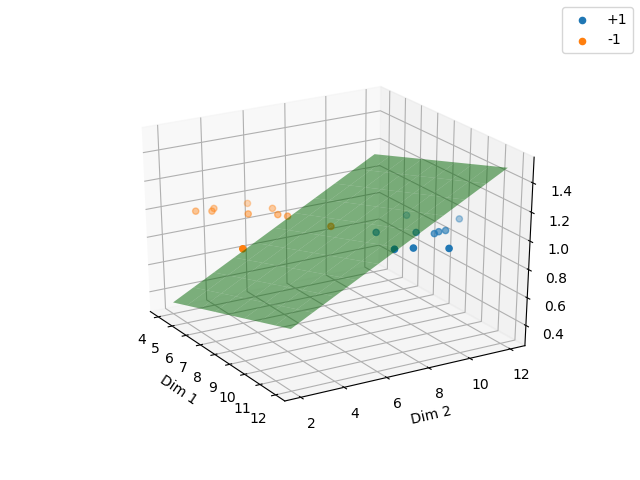

In [7]:
model.plane_plot(data, labels)